# 1.IMPORTING ALL THE REQUIRED PACKAGES.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
print("All required packages are imported")
from timeit import default_timer as timer

All required packages are imported


# 2. LOADING TRAIN AND TEST DATA,COMBINING TRAIN AND TEST DATA

In [3]:
data_train=pd.read_csv(r"C:\Users\RAJESH KUMAR\Desktop\project\train.csv")
print("Train dataset has been loaded")

Train dataset has been loaded


In [4]:
data_test=pd.read_csv(r"C:\Users\RAJESH KUMAR\Desktop\project\test.csv")
print("Test dataset has been loaded")

Test dataset has been loaded


In [5]:
data=data_train.append(data_test)
print("Train and test datasets are appended.")

Train and test datasets are appended.


# 3.ANALISING THE DATA

## 3.1 Checking the dimension of the data

In [6]:
rows,cols=data.shape
print("No. of Rows in the data: ",rows)
print("No. of Columns in the data: ",cols)

No. of Rows in the data:  10299
No. of Columns in the data:  563


## 3.2 Printing the sample of the data

In [7]:
data_train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## 3.3 Checking if the data contains NULL values

In [8]:
data.isnull().sum().any()
print("Data contains NULL values:",data.isnull().sum().any())

Data contains NULL values: False


## 3.4 Checking for DUPLICATED VALUES

In [66]:
data.duplicated().sum()
print("Number of DUPLICATED values in the Data:",data.duplicated().sum())

Number of DUPLICATED values in the Data: 0


## 3.5 Checking the columns present in the data

In [67]:
print("Columns Present in the Data Set")
print(data.columns)

Columns Present in the Data Set
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


## 3.6 Checking for Collinearity.

In [68]:
c=data.corr()
c.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656,0.020345
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233,-0.001577
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406,0.001981
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063,-0.061397
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511,-0.094486


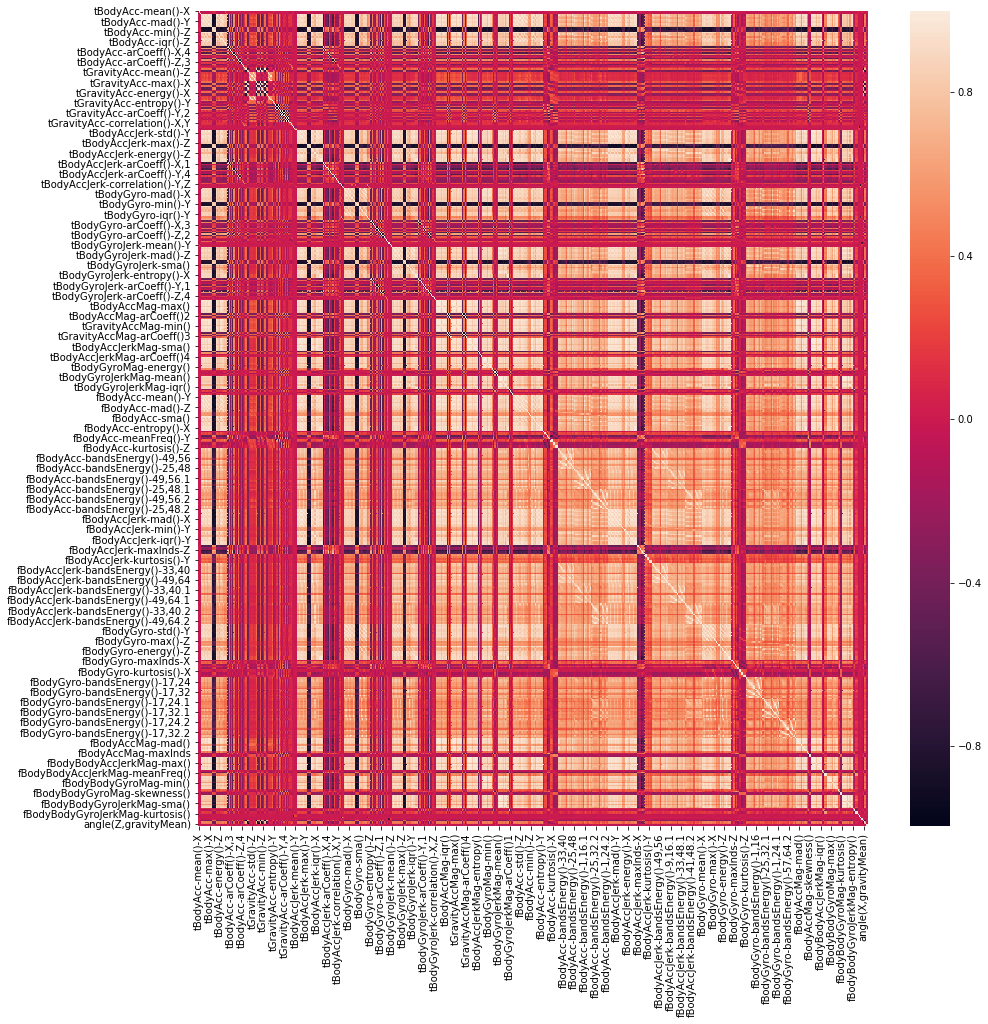

In [69]:
fig, size = plt.subplots(figsize=(15,15))
sns.heatmap(c,ax=size)

## 3.7 Checking the possible human activities that can be predicted.

In [70]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [71]:
print("Human Activities that can be predicted using this dataset are:")
for i in y.unique():
    print(i)

Human Activities that can be predicted using this dataset are:
STANDING
SITTING
LAYING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS


# 4. DATA VISUALISATION

## 4.1 Frequency of each activity

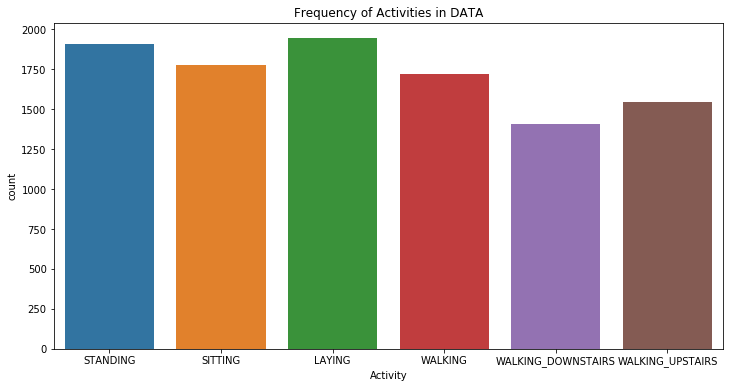

In [72]:
plt.figure(figsize = (12,6))
sns.countplot(data.Activity,)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in DATA')
plt.show()

## 4.2 Daily Routine i.e. time spent for each activity of the 30 candidates,whose data is collected. 

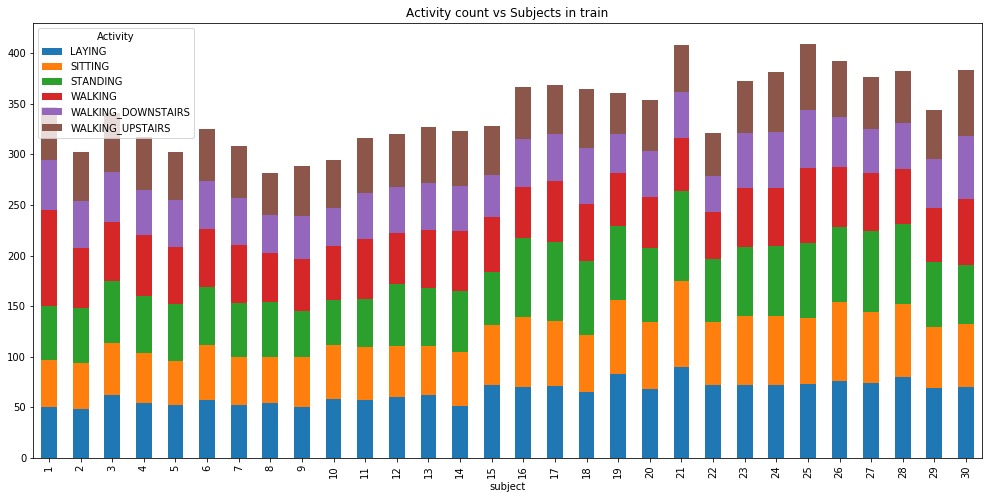

In [73]:
s = data.groupby(['subject','Activity']).size().unstack()
s.plot(kind='bar',stacked=True, figsize=(17, 8), title = 'Activity count vs Subjects in train')
plt.show()

# 5.DATA PREPROCESSING

#### The data contains no null values, no duplicate values. The data also have no categorial values in the features. But the data have high collinearity between the features and also the number of columns in the data is equal to 563 so to reduce the dimension,get rwed of collinearity and reduce the model fitting time we use Principal component analysis .


In [74]:
pca=PCA(.95)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,14.516791,-7.040348,-0.848517,-1.311452,1.918762,-0.754556,-0.576247,0.192814,0.673816,-1.212133,...,-1.017699,0.078554,0.424375,-0.476503,-0.496417,-0.103025,0.315891,-0.767794,0.385277,0.870693
1,14.512251,-7.066135,-0.714288,-1.728410,0.957263,-0.503252,0.936521,0.066616,-0.860003,-0.824904,...,0.109676,0.074631,0.143033,0.541779,0.051106,0.086291,0.097132,-0.440175,-0.152991,-0.277432
2,14.521702,-7.002312,-0.434467,-2.051527,0.740811,0.106743,-0.095229,0.016855,-0.017005,-0.098009,...,-0.227183,-0.067551,0.263619,0.849928,-0.066437,0.226349,0.109345,0.183628,0.331113,-0.018467
3,14.499971,-7.202094,0.218497,-2.058371,0.477533,-0.697812,0.861611,0.692418,-0.506246,0.514871,...,0.175465,-0.239330,-0.217249,-0.026504,0.171180,-0.490321,-0.219587,-0.055055,0.073012,0.263204
4,14.491649,-7.270128,0.422661,-2.277227,0.468014,-0.357469,0.282462,0.252537,-0.094981,0.543678,...,1.034987,-0.365778,-0.164534,-0.094855,-0.008105,-0.344132,0.482475,0.351103,-0.253227,-0.280327


#### After using PCA the size of the columns decreases. Checking the size.

In [18]:
rows,cols=x.shape
print("No of rows in the dataset after using PCA:",rows)
print("No of columns in the dataset after using PCA:",cols)

No of rows in the dataset after using PCA: 10299
No of columns in the dataset after using PCA: 29


# 6. Model fitting 

## 6.1 Model fitting using KNN 

### 6.1.1 Finding the random state required for splitting data in training and testing data for KNeighborsClassifier

In [19]:
ts_score =[]
import numpy as np
for j in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = j,test_size=.1)
    lr =KNeighborsClassifier().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k_KNN = ts_score.index(np.max(ts_score))
print("The Random State for splitting for KNeighborsClassifier:",k_KNN)

The Random State for splitting for KNeighborsClassifier: 161


### 6.1.2 Splitting the data into training and testing data.

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=161,test_size=.1)
print("Data has been splitted into x_train,x_test,y_train,y_test for KNeighborsClassifier")

Data has been splitted into x_train,x_test,y_train,y_test for KNeighborsClassifier


In [41]:
ex_time_RF_n = []
acc_RF_n = []
start_time = timer()
fit = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
pred = fit.predict(x_test)
accuracy = accuracy_score(y_test, pred)
elapsed = timer() - start_time    
ex_time_RF_n.append(elapsed)
acc_RF_n.append(accuracy)

### 6.1.3 Finding the optimum value of nearest neighbours

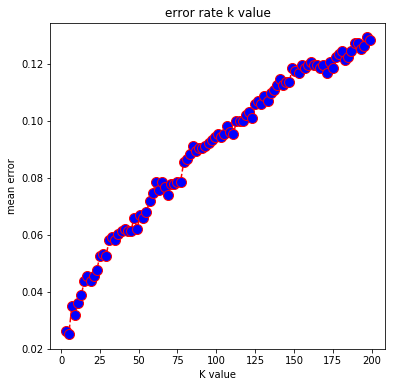

In [22]:
error=[]
for i in range(3,200,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y_test=knn.predict(x_test)
    error.append(np.mean(pred_y_test!=y_test))
plt.figure(1, figsize=(6, 6))
plt.plot(range(3,200,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('K value')
plt.ylabel('mean error')
plt.show()


### 6.1.4 Fitting the KNN model.

In [42]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 6.1.5 Prediction of y using the Model.

In [43]:
y_pred_KNN=classifier.predict(x_test)
print("The Model For KNeighboursClassifier is predicted")

The Model For KNeighboursClassifier is predicted


In [44]:
accuracy_score_KNN=accuracy_score(y_test,y_pred_KNN)

## 6.2 Model Fitting using DecisionTreeClassifier

### 6.2.1 Finding the random state required for splitting data in training and testing data for DecisionTreeClassifier

In [26]:
ts_score =[]
import numpy as np
for j in range(1200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = j,test_size=.1)
    lr =DecisionTreeClassifier(criterion="entropy",min_samples_leaf=0.01).fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k_DTC = ts_score.index(np.max(ts_score))
print("The Random State for splitting for DecisionTreeClassifier:",k_DTC)

The Random State for splitting for DecisionTreeClassifier: 1194


### 6.2.2 Splitting the data into training and testing data.

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1194,test_size=.1)
print("Data has been splitted into x_train,x_test,y_train,y_test for DecisionTreeClassifier")

Data has been splitted into x_train,x_test,y_train,y_test for DecisionTreeClassifier


In [46]:
start_time = timer()
fit = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=0.01).fit(x_train,y_train)
pred = fit.predict(x_test)
accuracy = accuracy_score(y_test, pred)
elapsed = timer() - start_time
    
ex_time_RF_n.append(elapsed)
acc_RF_n.append(accuracy)

### 6.2.3 Fitting the DecisionTreeClassifier.

In [60]:
dtc=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=.01)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 6.2.4 Prediction of y using the Model.

In [61]:
y_pred_DTC=dtc.predict(x_test)
print("The Model For DecisionTreeClassifier is predicted")

The Model For DecisionTreeClassifier is predicted


In [62]:
accuracy_score_DTC=accuracy_score(y_test,y_pred_DTC)

## 6.3 Model Fitting using RandomForestClassifier

### 6.3.1 Finding the random state required for splitting data in training and testing data for RandomForestClassifier

In [27]:
ts_score =[]
import numpy as np
for j in range(2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = j,test_size=.1)
    lr =RandomForestClassifier(random_state = 1511,min_samples_leaf=0.01 ).fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k_RFC = ts_score.index(np.max(ts_score))
print("The Random State for splitting for RandomForestClassifier:",k_RFC)

The Random State for splitting for RandomForestClassifier: 1633


In [28]:
ts_score =[]
import numpy as np
for j in range(2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 1633,test_size=.1)
    lr =RandomForestClassifier(random_state = j,min_samples_leaf=0.01 ).fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k= ts_score.index(np.max(ts_score))
print("The Random State for RandomForestClassifier parameter:",k)

The Random State for RandomForestClassifier parameter: 1511


### 6.3.2 Splitting the data into training and testing data.

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1633,test_size=.1)
print("Data has been splitted into x_train,x_test,y_train,y_test for RandomForestClassifier")

Data has been splitted into x_train,x_test,y_train,y_test for RandomForestClassifier


In [50]:
start_time = timer()
fit = RandomForestClassifier(random_state=1511,min_samples_leaf=0.01 ).fit(x_train,y_train)
pred = fit.predict(x_test)
accuracy = accuracy_score(y_test, pred)
elapsed = timer() - start_time
    
ex_time_RF_n.append(elapsed)
acc_RF_n.append(accuracy)

### 6.3.3 Fitting the RandomForestClassifier.

In [51]:
rf=RandomForestClassifier(random_state=1511,min_samples_leaf=0.01 )
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1511, verbose=0,
            warm_start=False)

### 6.3.4 Prediction of y using the Model.

In [52]:
y_pred_RFC=rf.predict(x_test)
print("The Model For RandomForestClassifier is predicted")

The Model For RandomForestClassifier is predicted


In [53]:
accuracy_score_RFC=accuracy_score(y_test,y_pred_RFC)

# 7.Determination of Accuracy

In [54]:
print("The Accuracy Score using KNeighborsClassifier is: ",accuracy_score_KNN)

The Accuracy Score using KNeighborsClassifier is:  0.974757281553398


In [63]:
print("The Accuracy Score using DecisionTreeClassifier is: ",accuracy_score_DTC)

The Accuracy Score using DecisionTreeClassifier is:  0.8543689320388349


In [58]:
print("The Accuracy Score using RandomForestClassifier is: ",accuracy_score_RFC)

The Accuracy Score using RandomForestClassifier is:  0.9058252427184466


# Graphical Representation of ACCURACY and EXECUTION Time for The Models Used.

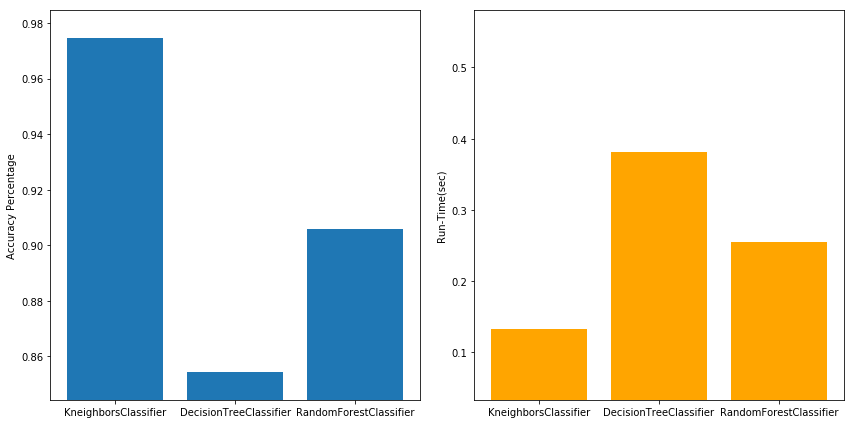

In [64]:
label = ('KneighborsClassifier','DecisionTreeClassifier','RandomForestClassifier')
Accu = acc_RF_n
ExTime = ex_time_RF_n

plt.figure(figsize = (12,6))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(1,2,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(1,2,2)
plt.bar(y_pos, ExTime, align='center', color = 'orange')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime) -.1 , max(ExTime) +0.2)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()